# Day_04: Solving differential equations

> ## Foreward note:
> After ignoring the _very_ obvious advice to install Julia from the official website or repo, 
> I finally uninstalled the Arch package (via `pacman -S julia`) and the Anaconda package (via `conda install -c conda-forge julia`) and installed Julia v1.7.2 through 
> - `git clone https://github.com/JuliaLang/julia.git`
> - `cd julia`
> - `make`
> - `./julia`
> I thought my Arch system would be up-to-date enough for the Julia packages or maybe Jupyter would work better if I used the Anaconda package. **All wrong**, just follow the well-documented path and install the correct packages. _Learn from my mistakes_. 

Today, I wanted to solve some differential equations. The [`DifferentalEquations` documentation](https://diffeq.sciml.ai/stable/tutorials/ode_example/#Example-2:-Solving-Systems-of-Equations) has some great initial examples. I chose the 1D exponential model to start, 

$\frac{du}{dt} = \lambda u$

where $\lambda$ is the exponential growth/decay parameter. For positive values, the more you have, the more you get. For negative values, the more you have, the more you lose.

In [1]:
using Plots, LaTeXStrings
using DifferentialEquations

## Setting up the differential equation

In this step, I built the differential equation as a function of `u`, `p`, and `t`. Here the
- `u` is the state of the differential equation, starting at an initial condition, `u0 = 1/2`. 
- `params` are the parameters in the function, in this case its my value of $\lambda$
- `t` is the current time

In [2]:
f(u,params,t) = params*u;
u0 = 1/2;
tspan = (0.0,1.0);
p = 1.01;
prob = ODEProblem(f,u0,tspan,p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

## Solving the differential equation

Now, `prob` is an `ODEProblem` that contains
- the function, `f(u, params, t)`
- the initial value (at t = 0), `u0`
- the timespan, `(0, 1.0)`
- and the parameters, `params = p`

Solving this oridinary differential equation is now done with `solve` as such,

In [3]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.09964258706516003
 0.3457024247583422
 0.6776921908052249
 1.0
u: 5-element Vector{Float64}:
 0.5
 0.552938681151017
 0.7089376245893466
 0.9913594502399236
 1.3728004409033037

## Checking the output

The output from `solve` is _really_ nice. You can 
- check the time steps, `t: 5-element Vector {Float64}`
- check the solutions, `u: 5-element Vector {Float64}`
- interpolate between values, `sol(0.5)`
- [plus more](https://diffeq.sciml.ai/stable/basics/solution/#solution)

For example, here I plot the time vs current value. Then, add the interpolated point at t = 0.5

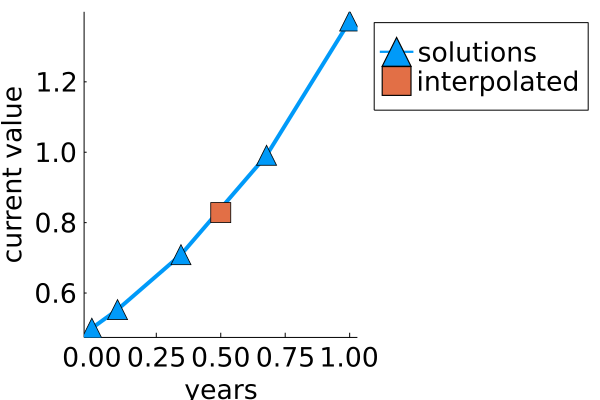

In [4]:
Plots.theme(:cooper)
halftime = 0.5
plot(sol.t, sol.u, markershape = :utriangle, label = "solutions")
scatter!([halftime], [sol(halftime)], markershape = :square, label = "interpolated")
plot!(xlabel = "years", ylabel = "current value")

## Changing parameters in model

Next, I wanted to change the value of $\lambda$. Below I set up a `for`-loop to change $\lambda = 1.1,~ 1.01,~ 0,~ -1,~ -2$. I have to create a _new_ problem in each case before running the solver and plotting the results. I also create smoother lines by interpolating with 11 time steps. 

> Note: when I plot inside a `for`-loop, I needed to create an initial empty plot and assign it to a variable, `plts`. Then, I added plots inside the loop using `plot!`. Finally, displaying the result with a call to `plts`

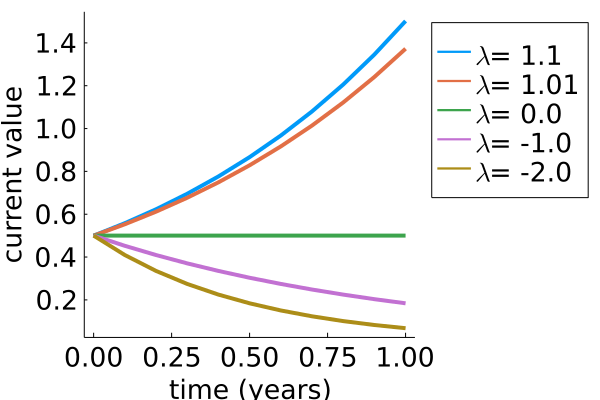

In [5]:
t = range(0, 1, 11)

plts = plot(bg=:white, xlabel = "time (years)", ylabel = "current value")
for p in [1.1, 1.01, 0, -1, -2]
    prob = ODEProblem(f,u0,tspan,p)
    sol = solve(prob)
    t = range(0, 1, 11)
    plot!(t, sol(t), label = string(L"$\lambda$","= $p"))
end
plts

## Animating the effect of change

Its amazing what the effect of exponential growth can have on your health, knowledge, bank account, etc. If each day you're increasing your knowledge by 1%, then by the end of the year you don't have 100+365% knowledge, you have 3,778% of the knowledge you had a year ago. When you continuously integrate, it grow faster. 

Here I build an animation from exponential decay, $\lambda = -2$ to exponential growth, $\lambda = 2$ every 0.1 steps. 

First, I set up the plot background, labels, and ylimits. Then, use the `@gif` to loop through each value of $\lambda$ for parameter, `p`.

┌ Info: Saved animation to 
│   fn = /home/ryan/Documents/Career_docs/cooperrc-gh-pages/Julia-learning/tmp.gif
└ @ Plots /home/ryan/.julia/packages/Plots/D9pfj/src/animation.jl:114


Plots.AnimatedGif("/home/ryan/Documents/Career_docs/cooperrc-gh-pages/Julia-learning/tmp.gif")
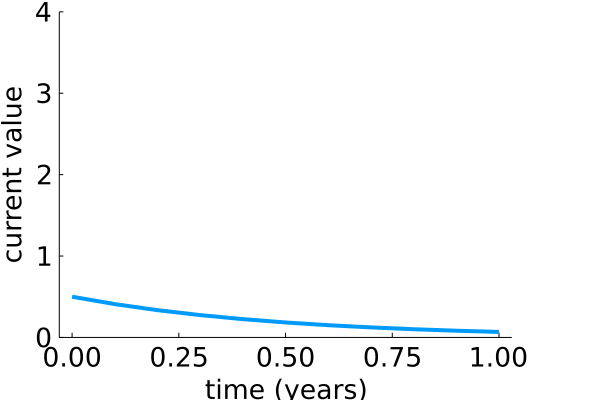

In [6]:
plts = plot(bg=:white, 
    xlabel = "time (years)", 
    ylabel = "current value", 
    ylims = (0, 4))

@gif for p in -2:0.1:2
    prob = ODEProblem(f,u0,tspan,p)
    sol = solve(prob)
    t = 0:0.1:1
    plot!(t, sol(t), label = "")#string(L"$\lambda$","= $p"))
end

## Wrapping up

Today, I had planned to look at a more advanced set of differential equations, but I ran into `Pkg` version issues _because I did not follow the standard practices that were suggested_. I **love** the "free" interpolation in the `DifferentialEquations` solver. I have made so many numerical solutions that I solve with unnecessary precision and number of timesteps because I wanted to compare specific values at given times. These first-order growth/decay models converge quickly, but sometimes I need to know a value at $t=0.6$, so I resolve the differential equation with smaller steps. It makes much more sense to interpolate.